In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the Dataset

In [2]:
import pandas as pd

# Load the data
file_path = '/content/drive/My Drive/AMZN.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Oct 2, 2024",184.44,186.60,184.04,184.76,184.76,"23,664,500"
1,"Oct 1, 2024",184.9,186.19,183.45,185.13,185.13,"36,044,900"
2,"Sep 30, 2024",187.14,188.49,184.65,186.33,186.33,"41,583,900"
3,"Sep 27, 2024",190.68,190.90,187.34,187.97,187.97,"36,002,300"
4,"Sep 26, 2024",194.31,194.53,189.54,191.16,191.16,"36,334,900"


# Data Preprocessing

In [3]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date as the index
df.set_index('Date', inplace=True)

# Handle missing values if any
df.fillna(method='ffill', inplace=True)

# Display summary statistics
df.describe()


<ipython-input-3-72ebc25c832c>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,High,Low,Close,Adj Close
count,6895.000000,6895.000000,6895.000000,6895.000000
mean,38.730922,37.791051,38.271604,38.271604
std,55.401283,54.099554,54.756555,54.756555
min,0.070000,0.070000,0.070000,0.070000
25%,2.130000,2.050000,2.085000,2.085000
50%,8.890000,8.690000,8.800000,8.800000
75%,57.985000,56.650000,57.350000,57.350000
max,201.200000,199.050000,200.000000,200.000000


# Data Visualization

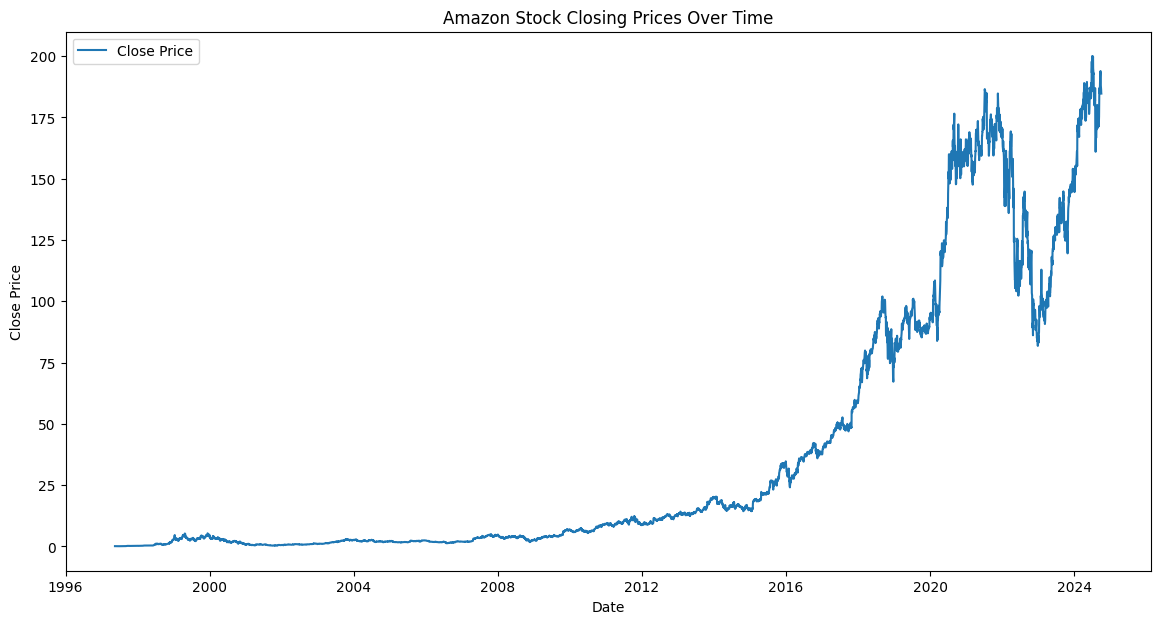

In [4]:
import matplotlib.pyplot as plt

# Plot closing price over time
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.title('Amazon Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


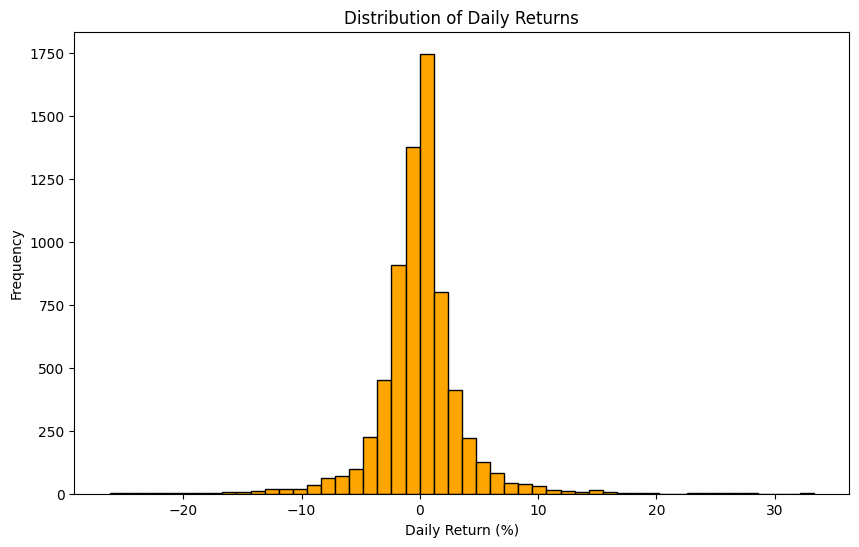

In [8]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change() * 100

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(df['Daily_Return'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()


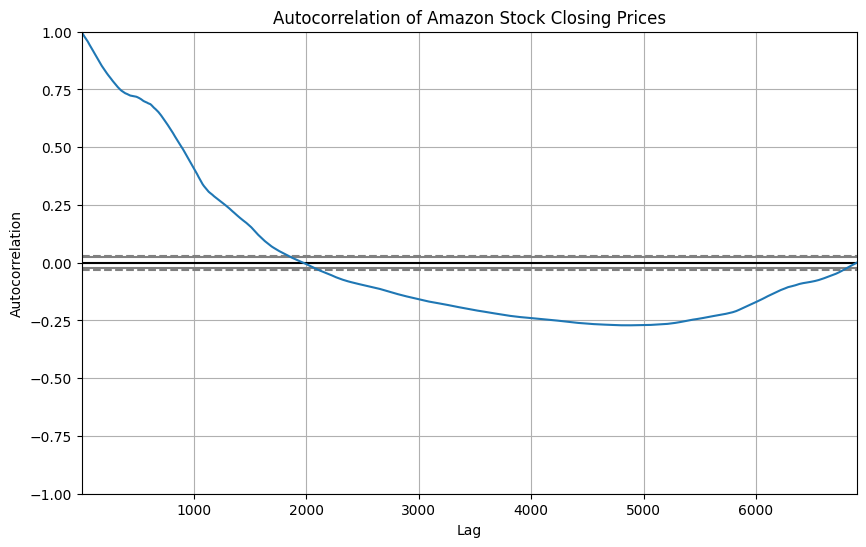

In [10]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot of closing price
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation of Amazon Stock Closing Prices')
plt.show()
